In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_folder = '/group/ag_compstatphys/data/tolga/walls'

In [3]:
def read_ssf(file_name, structure):

    file_path = f'{data_folder}/{file_name}'
 

    with h5py.File(file_path, 'r') as sim_data:

        wavenumber = np.array(sim_data[f'ssf/{structure}/wavenumber'])
        
        # Calculate time averaged static structure along simulation box
        ssf = np.zeros((wavenumber.shape[0], 3))

        ssf = sim_data[f'ssf/{structure}/value']
        ssf_mean = np.average(np.array(ssf), axis = 0)

    return wavenumber, ssf_mean
    


In [7]:
np.where(ssf > 200000)

(array([ 346,  692, 1039, 1039, 1386, 1470, 1470, 1732, 2079, 2079, 2324,
        2324, 2325, 2325, 2426, 2772, 2940, 2940, 2941, 2941, 3119, 3119]),
 array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1]))

In [8]:
wavenumber[346]

10.901326507956535

In [9]:
14.711538 - 13.557693

1.1538449999999987

In [11]:
9.519231-8.365384

1.153846999999999

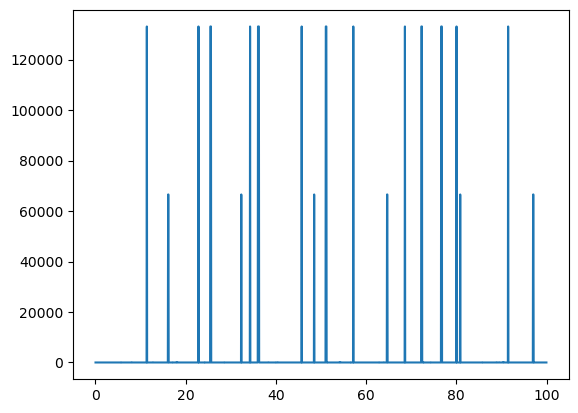

In [7]:
wavenumber, ssf = read_ssf("crystalline_walls_100_W15_rho3_ssf.h5", "parallel")
plt.plot(wavenumber[:], ssf[:, 0])
#plt.xscale("log")

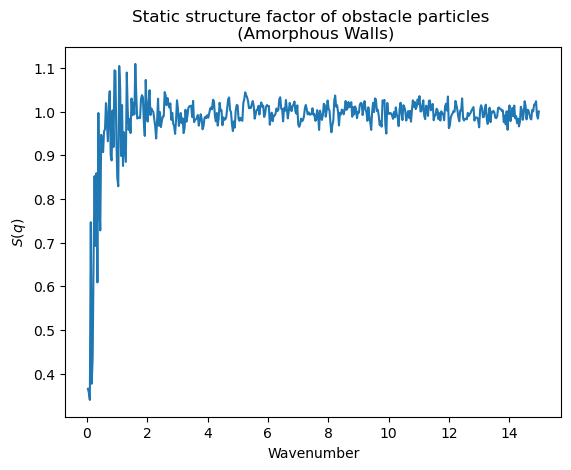

In [ ]:
wavenumber, ssf = read_ssf("amorphous_wall_200_ssf_LE.h5", "bulk_parallel")
plt.plot(wavenumber, ssf[:, 0])


plt.title(f"Static structure factor of obstacle particles \n (Amorphous Walls)")
plt.ylabel(r"$S(q)$")
plt.xlabel(r"Wavenumber")
#plt.xscale("log")
plt.show()

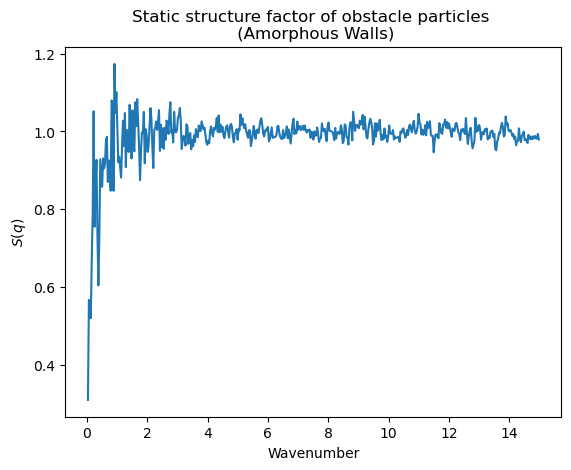

In [7]:
wavenumber, ssf = read_ssf("amorphous_wall_200_ssf_LE_co35.h5", "bulk_parallel")
plt.plot(wavenumber, ssf[:, 0])


plt.title(f"Static structure factor of obstacle particles \n (Amorphous Walls)")
plt.ylabel(r"$S(q)$")
plt.xlabel(r"Wavenumber")
#plt.xscale("log")
plt.show()

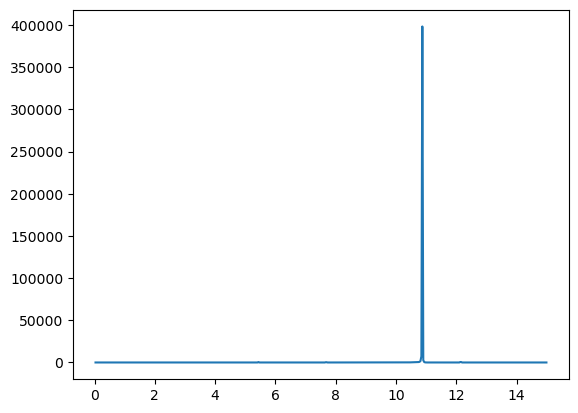

In [11]:
wavenumber, ssf = read_ssf("amorphous_wall_200_ssf_LE.h5", "bulk_parallel")
plt.plot(wavenumber, ssf[:, 0])
#plt.xscale("log")

In [ ]:
wavenumber, ssf = read_ssf("amorphous_wall_200_ssf.h5", "pbulkarallel")
plt.plot(wavenumber, ssf[:, 0])
#plt.xscale("log")

KeyError: 'Unable to open object (component not found)'

In [13]:
wavenumber, ssf = read_ssf("crystalline_wall_200_ssf.h5", "bulk_parallel")
plt.plot(wavenumber, ssf[:, 0])
#plt.xscale("log")

KeyError: 'Unable to open object (component not found)'

In [8]:
def ornstein_zernike(params, q, rho, temp):
    """ Static structure factor in Ornstein-Zernike approximation """
    kappa, xi = params
    return rho * temp * kappa / (1 + (q * xi)**2)

In [9]:
import scipy.odr as odr


rho, temperature = 0.75, 1.0


kappa_liquid = np.mean(ssf[:, 1]) / rho / temperature # initial guess
# result is a tuple (param, param_err, covariance_matrix)
param, param_err = odr.odr(
    ornstein_zernike                        # fit model
    , (kappa_liquid, 1)                       # initial parameter values (kappa, xi)
    , ssf[:3, 1], ssf[:3, 0]  # data (y, x)
    , extra_args=(rho, temperature,), full_output=0
)[:2]


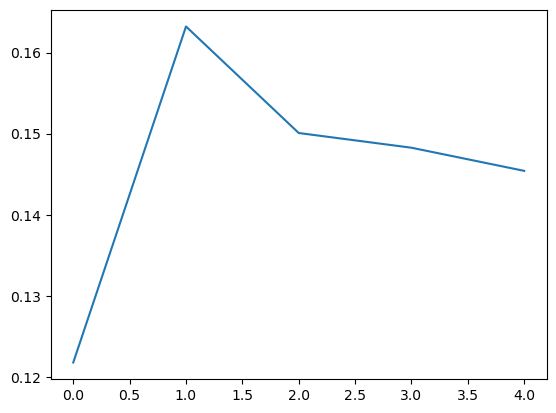

In [10]:
plt.plot(ssf[:5,0])

In [11]:
from scipy.optimize import curve_fit

def lorentzian(q, s0, xi):

    return s0 / (1 + (q * xi)**2)

In [12]:
x = wavenumber[:5]
y = ssf[:5,0]

popt, pcov = curve_fit(lorentzian, x, y)

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


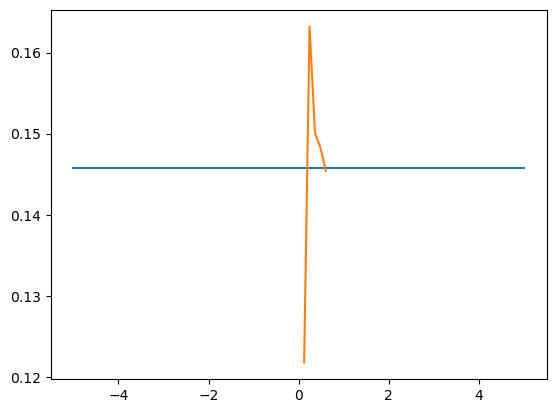

In [13]:
xx = np.linspace(-5, 5, 100)
plt.plot(xx, lorentzian(xx, popt[0], popt[1]))
plt.plot(x, y)


In [3]:
data_folder = '/group/ag_compstatphys/data/tolga/walls'
file_name = "crystalline_wall_200_ssf.h5"

file_path = f'{data_folder}/{file_name}'


with h5py.File(file_path, 'r') as sim_data:

    wavenumber = np.array(sim_data['ssf/global_parallel/wavenumber'])
    
    # Calculate time averaged static structure along simulation box
    ssf = np.zeros((wavenumber.shape[0], 3))

    ssf = sim_data['ssf/global_parallel/value']
    ssf_mean = np.average(np.array(ssf), axis = 0)



In [12]:
ssf_mean.shape

(477, 3)

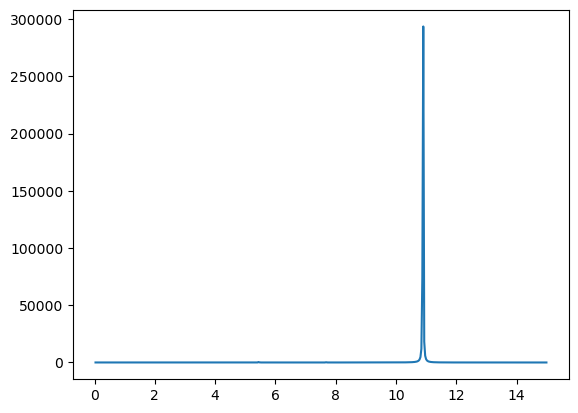

In [14]:
plt.plot(wavenumber, ssf_mean[:,0])